In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as war
from IPython.display import display

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
display(df)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df["gender"].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [9]:
df["race_ethnicity"].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [10]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["avg_score"] = df["total_score"] / 3

In [11]:
display(df.head())

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='avg_score', ylabel='Count'>

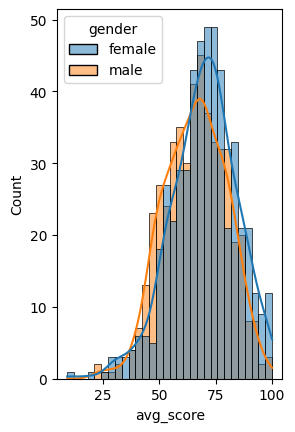

In [12]:
plt.subplot(121)  # 1 row, 2 columns, 1st subplot
sb.histplot(data=df, x='avg_score', bins=30, kde=True, hue='gender')


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['math_score', 'reading_score', 'writing_score', 'total_score', 'avg_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler 

transform = ColumnTransformer(
    transformers=[
        ("cat", OrdinalEncoder(),categorical_features),
        ("num", StandardScaler(), numeric_features)
    ]
)

df = transform.fit_transform(df)


In [15]:
df_transformer = pd.DataFrame(df, columns=categorical_features +numeric_features)  

In [16]:
display(df_transformer.head())

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,0.0,1.0,1.0,1.0,1.0,0.390024,0.193999,0.391492,0.343574,0.343574
1,0.0,2.0,4.0,1.0,0.0,0.192076,1.427476,1.313269,1.021927,1.021927
2,0.0,1.0,3.0,1.0,1.0,1.577711,1.770109,1.642475,1.747064,1.747064
3,1.0,0.0,0.0,0.0,1.0,-1.259543,-0.833899,-1.583744,-1.293830,-1.293830
4,1.0,2.0,4.0,1.0,1.0,0.653954,0.605158,0.457333,0.600881,0.600881
